<a href="https://colab.research.google.com/github/TarunSunkaraneni/TensorFlow/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

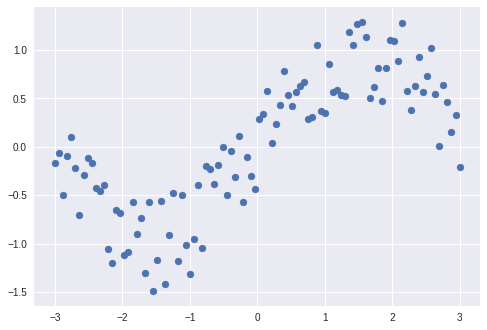

In [7]:
n_observations = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3,3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5, n_observations)
ax.scatter(xs, ys)

In [0]:
# tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X,W), b)

In [0]:
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations -1)

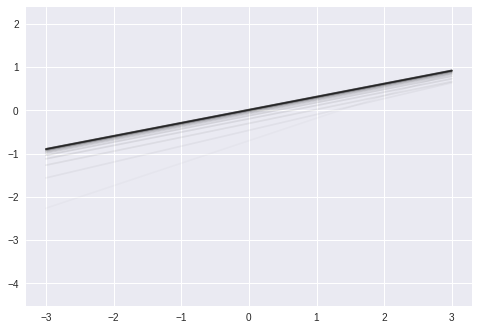

In [28]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
n_epochs = 1000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  prev_training_cost = 0
  for epoch in range(n_epochs):
    for (x, y) in zip(xs, ys):
      sess.run(optimizer, feed_dict={X:x, Y: y})
    training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
    if epoch % 20 == 0:
      plt.plot(xs, Y_pred.eval(feed_dict={X:xs}, session=sess), 'k', alpha=epoch / n_epochs)
    if np.abs(training_cost - prev_training_cost) < 0.000001:
      break
    prev_training_cost = training_cost
    
  plt.plot(xs, Y_pred.eval(feed_dict={X:xs}, session=sess), 'k', alpha=epoch / n_epochs)